In [2]:
import torch
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## Самостоятельная реализация свертки

In [3]:
def corr2d(X, K):  
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

In [4]:
X = torch.Tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
K = torch.Tensor([[0, 1], [2, 3]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

## Детекция граней

In [5]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [6]:
## вертикальные грани есть
K = torch.Tensor([[1, -1]])
Y = corr2d(X, K)
print(X)
print(Y)

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])
tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])


In [7]:
## вертикальных граней нет
Z = corr2d(X.T, K)
print(X.T)
print(Z)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


## Сверточный слой

Реализуем сверточный слой, который будет детектировать грани "изображения".


In [ ]:
# Делаем reshape (можно воспользоваться view()) для того чтобы приравнять изображение к стандартному входу (размер_батча, высота, ширина, каналы)
X = X.reshape(1, 1, 6, 8)
Y = Y.reshape(1, 1, 6, 7)

In [ ]:
# Зададим сверточный слой который будет принимать аргументы (количество_входных_каналов, количество_выходных_каналов, (размер сверточного ядра))
# Так же можно задать Padding, Stride и Delay
conv2d = torch.nn.Conv2d(1, 1, (1,2))

In [ ]:
trainer = torch.optim.SGD(conv2d.parameters(), lr=0.001)
criterion = torch.nn.MSELoss(reduction='sum')

In [ ]:
for i in range(500):
    trainer.zero_grad()
    Y_hat = conv2d(X)
    l = criterion(Y_hat,Y)
    l.backward()
    trainer.step()
    if (i + 1) % 2 == 0:
        print('batch %d, loss %.3f' % (i + 1, l.item()))

In [ ]:
print(conv2d.weight)
print(conv2d.bias)

## Padding и stride

In [ ]:
conv2d = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

In [ ]:
conv2d =torch.nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

## Каналы

In [ ]:
conv2d = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

In [ ]:
conv2d.weight.shape

In [ ]:
conv2d = torch.nn.Conv2d(3, 32, kernel_size=3, padding=1)
X = torch.randn((1, 3, 8, 8))
conv2d(X).shape

In [ ]:
conv2d.weight.shape

## Pooling

In [ ]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [ ]:
X = torch.Tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(X)
print(pool2d(X, (2, 2)))

In [ ]:
pool2d(X, (2, 2), 'avg')

In [ ]:
X = torch.arange(16).reshape((1, 1, 4, 4)).type(torch.float)
X

In [ ]:
X.shape

In [ ]:
pool2d = torch.nn.MaxPool2d(3)
pool2d(X)

In [ ]:
pool2d = torch.nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

In [ ]:
pool2d = torch.nn.MaxPool2d((2, 3), padding=(1, 1), stride=(2, 3))
pool2d(X)

In [ ]:
X = torch.cat((X, X + 1), dim=1)
X

In [ ]:
pool2d = torch.nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

## Lenet

In [9]:
import torchvision as tv
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
BATCH_SIZE=256

In [11]:
train_dataset = tv.datasets.MNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.MNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

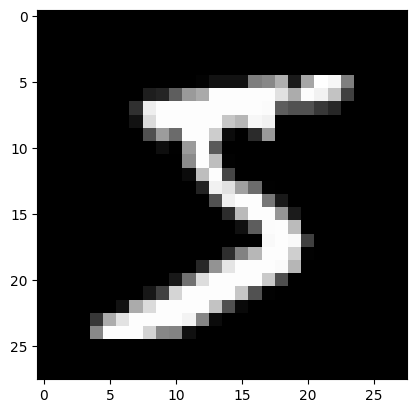

In [12]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

In [13]:
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 6, kernel_size=5, padding=2),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2, stride=2),
    torch.nn.Conv2d(6, 12, kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2, stride=2),
    torch.nn.Flatten(),
    torch.nn.Linear(300, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, 10)
)

In [15]:
list(model.parameters())

[Parameter containing:
 tensor([[[[ 0.1647,  0.1717,  0.1011,  0.0921,  0.0666],
           [ 0.0009,  0.0918,  0.1175, -0.0223,  0.1462],
           [ 0.0510, -0.0760,  0.0976,  0.0518, -0.0859],
           [-0.0979, -0.0053, -0.1588, -0.1454,  0.0970],
           [ 0.0903, -0.1364,  0.0827,  0.0557, -0.1885]]],
 
 
         [[[-0.0129, -0.0014, -0.1177,  0.1094, -0.1596],
           [ 0.0331, -0.0093,  0.0552,  0.0717,  0.1612],
           [-0.0585, -0.0840, -0.1302, -0.0907,  0.1514],
           [ 0.1224,  0.0862, -0.1437, -0.0219,  0.1748],
           [ 0.0417, -0.1873,  0.0885,  0.0678, -0.0018]]],
 
 
         [[[ 0.0061, -0.0628, -0.0877,  0.1280, -0.1031],
           [-0.0544, -0.1150, -0.1857,  0.1303,  0.0493],
           [ 0.0130,  0.0731,  0.1789, -0.0612,  0.0614],
           [ 0.1223, -0.0183, -0.1217, -0.1357,  0.1015],
           [ 0.1583, -0.0784,  0.1219, -0.1096,  0.0881]]],
 
 
         [[[-0.0731, -0.1491,  0.1409, -0.1161,  0.1617],
           [-0.0788, -0.1076, -

In [18]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 28, 28)
print(X.shape)
for l in model:
    X = l(X)
    print("Layer {}. X shape: {}".format(l, X.shape))

torch.Size([1, 1, 28, 28])
Layer Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)). X shape: torch.Size([1, 6, 28, 28])
Layer ReLU(). X shape: torch.Size([1, 6, 28, 28])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 6, 14, 14])
Layer Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 12, 10, 10])
Layer ReLU(). X shape: torch.Size([1, 12, 10, 10])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 12, 5, 5])
Layer Flatten(start_dim=1, end_dim=-1). X shape: torch.Size([1, 300])
Layer Linear(in_features=300, out_features=50, bias=True). X shape: torch.Size([1, 50])
Layer ReLU(). X shape: torch.Size([1, 50])
Layer Linear(in_features=50, out_features=10, bias=True). X shape: torch.Size([1, 10])


In [19]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 28, 28)
y = model(X)
print(y.shape)

torch.Size([1, 10])


In [20]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = torch.Tensor([0]), 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [21]:
def train(net, train_iter, test_iter, trainer, num_epochs):
    loss = torch.nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [22]:
lr, num_epochs = 0.001, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs)

epoch 1, loss 0.1070, train acc 0.967, test acc 0.975, time 11.2 sec
epoch 2, loss 0.0744, train acc 0.977, test acc 0.978, time 10.4 sec
epoch 3, loss 0.0598, train acc 0.982, test acc 0.982, time 10.5 sec
epoch 4, loss 0.0513, train acc 0.984, test acc 0.985, time 10.5 sec
epoch 5, loss 0.0447, train acc 0.987, test acc 0.985, time 12.4 sec


## Обучение на GPU

In [ ]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
dev

In [ ]:
model = model.to(dev)

In [ ]:
def train(net, train_iter, test_iter, trainer, num_epochs, dev):
    loss = nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            X, y = X.to(dev), y.to(dev)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net, dev)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [ ]:
def evaluate_accuracy(data_iter, net, dev):
    acc_sum, n = torch.Tensor([0]).to(dev), 0
    for X, y in data_iter:
        X, y = X.to(dev), y.to(dev)
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [ ]:
lr, num_epochs = 0.001, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, dev)